In [1]:
# This Python 3 environment,running on a jupyter notebook
# Useful packages used for visualization and effeciency

import numpy as np # linear algebra computing
import pandas as pd # for data processing
import matplotlib.pyplot as plt # for visualization of data
import seaborn as sns # for visualization of data

In [2]:
df = pd.read_csv('/kaggle/input/urinary-biomarkers-for-pancreatic-cancer/Debernardi et al 2020 data.csv', usecols=['creatinine', 'LYVE1','age', 'sex','TFF1','plasma_CA19_9', 'REG1A', 'REG1B', 'diagnosis'])
df['diagnosis'] = df['diagnosis'] == 3
df['sex'] = df['sex'].map({'M': 1, 'F': 0})

# sample data
df.head(20)

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,0,False,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,81,0,False,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,51,1,False,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,61,1,False,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,62,1,False,9.0,0.21489,0.000860,65.54000,41.088000,NaN
5,53,1,False,NaN,0.84825,0.003393,62.12600,59.793000,NaN
6,70,1,False,NaN,0.62205,0.174381,152.27700,117.516000,NaN
7,58,0,False,11.0,0.89349,0.003574,3.73000,40.294000,NaN
8,59,0,False,NaN,0.48633,0.001945,7.02100,26.782000,NaN
9,56,0,False,24.0,0.61074,0.278778,83.92800,19.185000,NaN


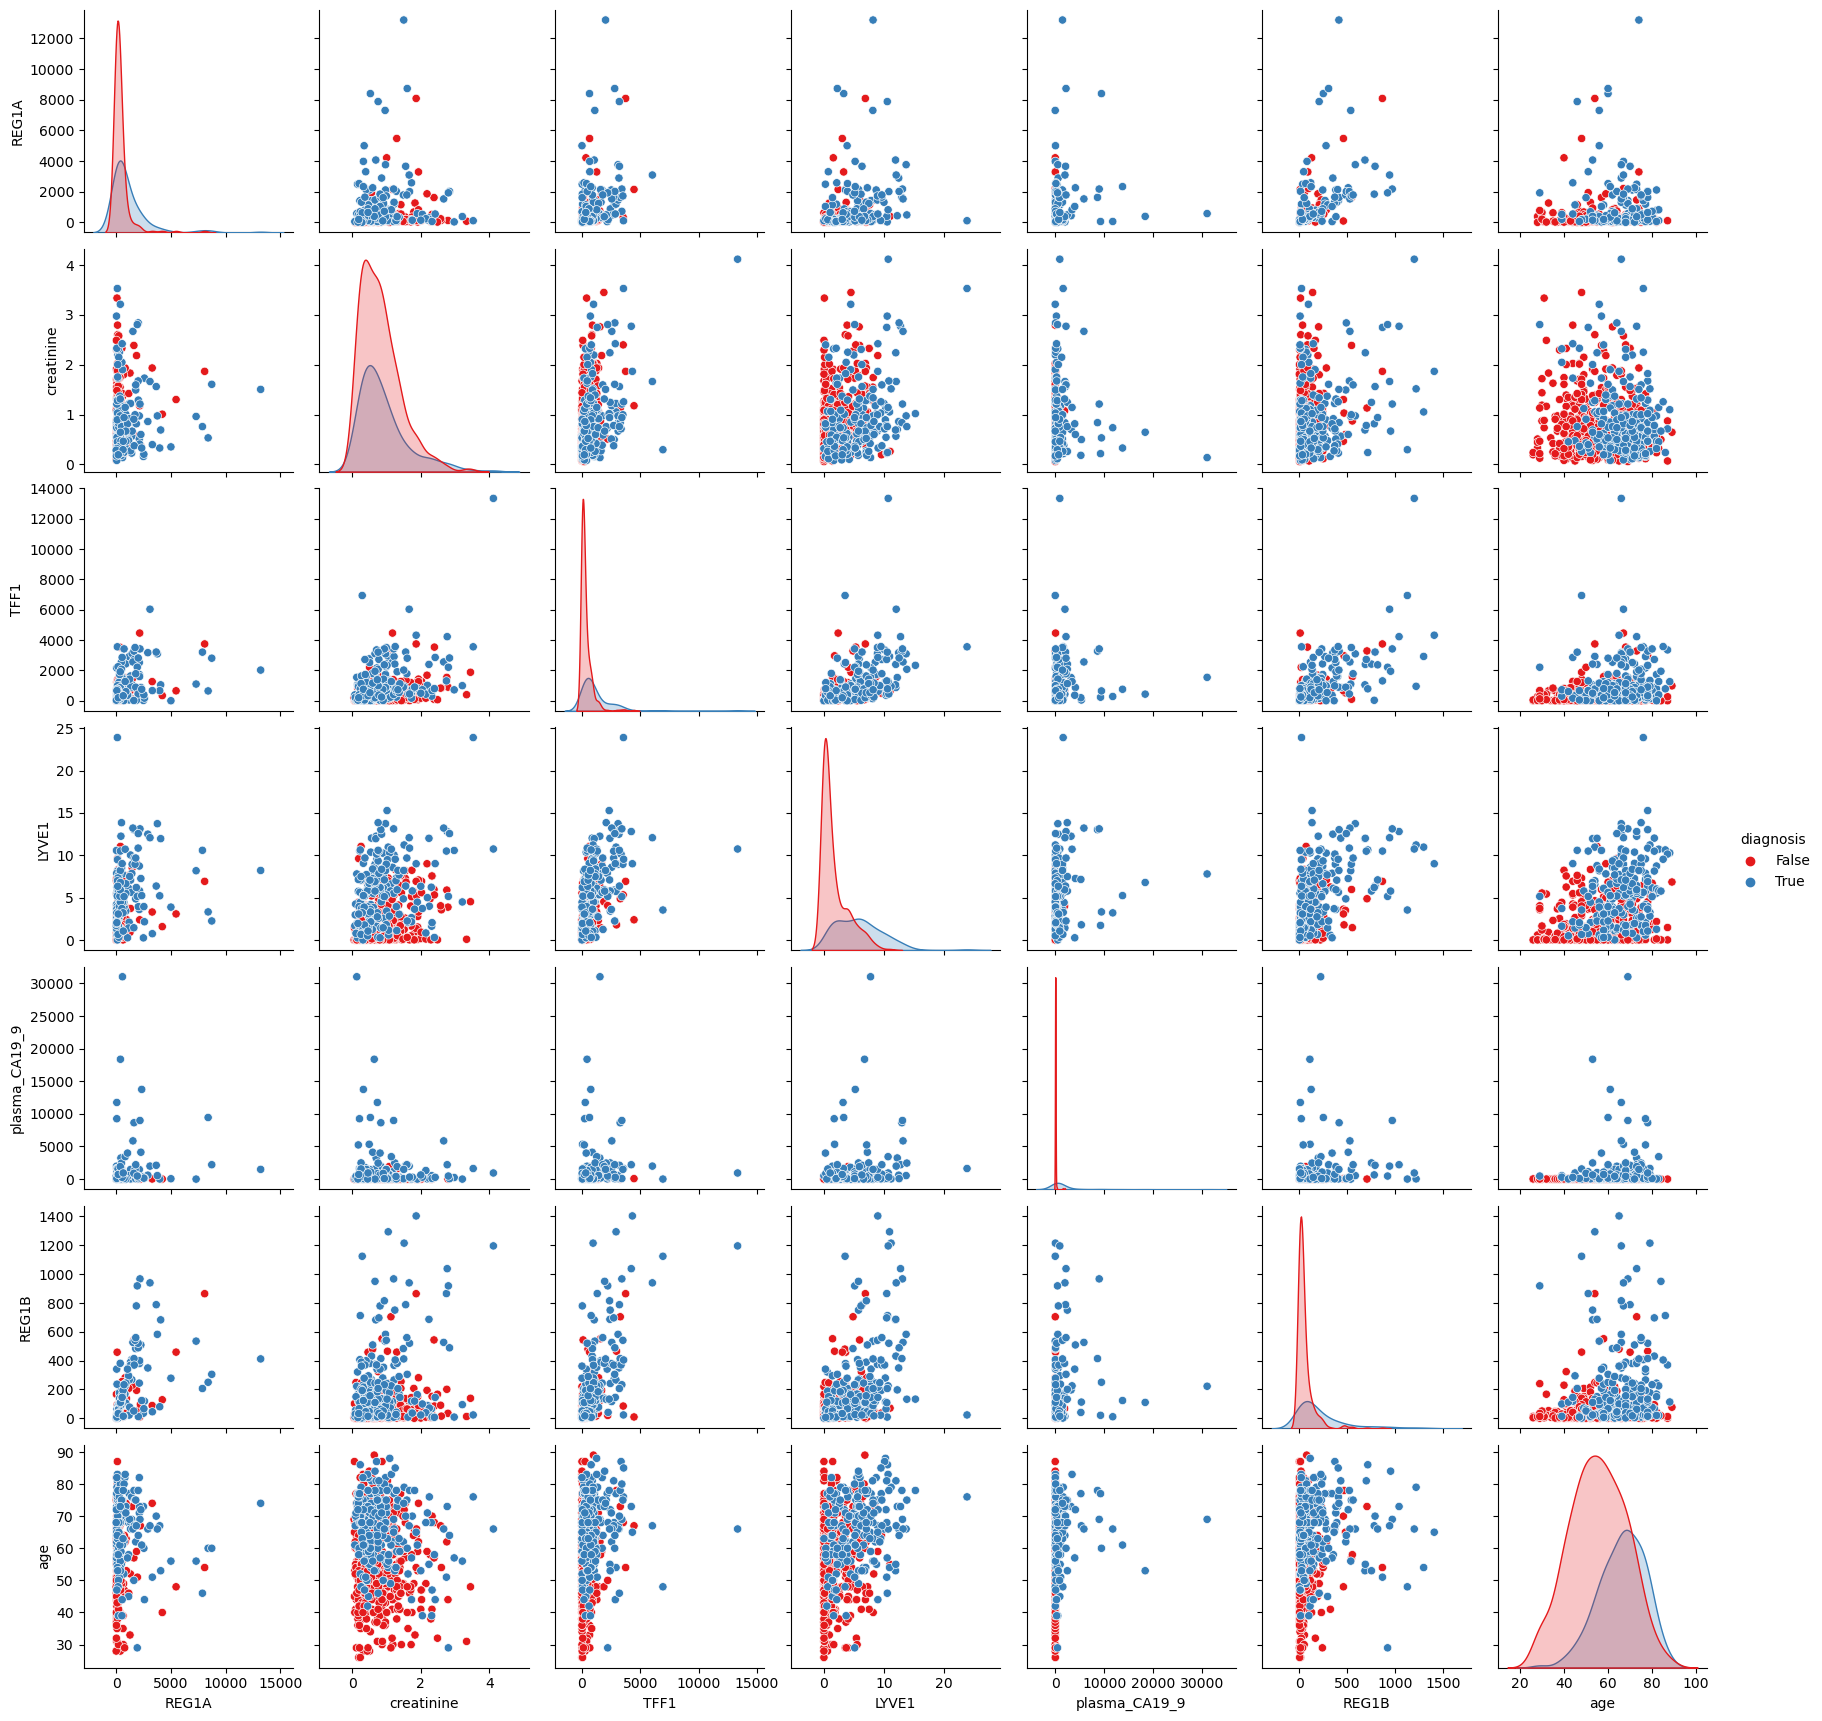

In [3]:
# true and false pair plot, and their correlation with the hyperparamters
sns.pairplot(data = df, vars=['REG1A','creatinine','TFF1', 'LYVE1','plasma_CA19_9', 'REG1B','age'], hue='diagnosis', diag_kind='kde', palette = 'Set1')

<Axes: >

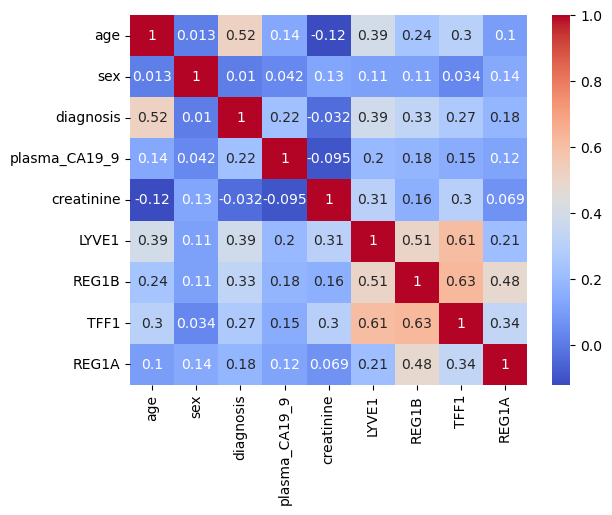

In [4]:
# confusion matrix with heat map, showing their correlation with the hyperparamters
corr = df.dropna().corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Best parameters (Random Forest):  {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Best score (Random Forest):  0.8644120940649497
Cross-Validation Scores (Random Forest): [0.84210526 0.84210526 0.86170213 0.81914894 0.90425532]
Mean CV Score (Random Forest): 0.8538633818589026
Test set accuracy (Random Forest):  0.8559322033898306


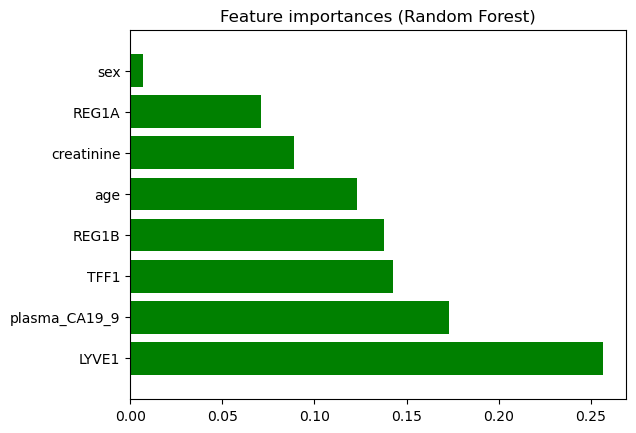

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_np = X_train.values
y_train_np = y_train.values

from sklearn.model_selection import cross_val_score

# Define the pipeline with an extended grid of parameters
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('rf', RandomForestClassifier())
])

# Define an extended grid of parameters to search over
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 15],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Create the grid search object with cross-validation
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search object to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters (Random Forest): ", grid_search_rf.best_params_)
print("Best score (Random Forest): ", grid_search_rf.best_score_)

# Evaluate training accuracy for Random Forest with cross-validation
cv_scores_rf = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train, cv=5)
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)
print("Mean CV Score (Random Forest):", np.mean(cv_scores_rf))

# Select the best model
best_model_rf = grid_search_rf.best_estimator_

# Make predictions with the best model
y_pred_rf = best_model_rf.predict(X_test)

# Print the accuracy of the best model on the test set
print("Test set accuracy (Random Forest): ", accuracy_score(y_test, y_pred_rf))

# Get feature importances from the best model
importances_rf = best_model_rf.named_steps['rf'].feature_importances_

# Sort the feature importances in descending order and get the indices
indices_rf = np.argsort(importances_rf)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature importances (Random Forest)")
plt.barh(range(X_train.shape[1]), importances_rf[indices_rf],
       color="g", align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices_rf])
plt.ylim([-1, X_train.shape[1]])
plt.show()

Best parameters (LightGBM):  {'lgbm__learning_rate': 0.01, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 200, 'lgbm__num_leaves': 31}
Best score (LightGBM):  0.8876595744680851
Cross-Validation Scores (LightGBM): [0.92631579 0.87368421 0.89361702 0.81914894 0.92553191]
Mean CV Score (LightGBM): 0.8876595744680851
Classification report (LightGBM): 
               precision    recall  f1-score   support

       False       0.99      0.89      0.93        80
        True       0.80      0.97      0.88        38

    accuracy                           0.92       118
   macro avg       0.90      0.93      0.91       118
weighted avg       0.93      0.92      0.92       118

Balanced accuracy (LightGBM):  0.9305921052631578


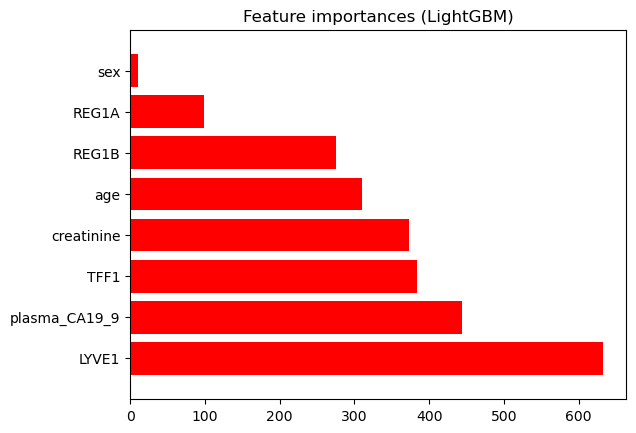

In [6]:
# imports necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import  classification_report, balanced_accuracy_score

# LightGBM Classification
import lightgbm as lgb

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling for LightGBM
pipeline_lgbm = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', lgb.LGBMClassifier(objective='binary', is_unbalance=True, random_state=42))
])

# Define the extended grid of parameters to search over for LightGBM
param_grid_lgbm = {
    'lgbm__n_estimators': [50, 100, 200],
    'lgbm__learning_rate': [0.01, 0.1, 0.2],
    'lgbm__max_depth': [5, 10, 15],
    'lgbm__num_leaves': [31, 50, 100]
}

# Create the extended grid search object for LightGBM with cross-validation
grid_search_lgbm = GridSearchCV(pipeline_lgbm, param_grid_lgbm, cv=5, scoring='accuracy')

# Fit the grid search object to the data for LightGBM
grid_search_lgbm.fit(X_train, y_train)

# Print the best parameters and the best score for LightGBM
print("Best parameters (LightGBM): ", grid_search_lgbm.best_params_)
print("Best score (LightGBM): ", grid_search_lgbm.best_score_)

# Evaluate training accuracy for LightGBM with cross-validation
cv_scores_lgbm = cross_val_score(grid_search_lgbm.best_estimator_, X_train, y_train, cv=5)
print("Cross-Validation Scores (LightGBM):", cv_scores_lgbm)
print("Mean CV Score (LightGBM):", np.mean(cv_scores_lgbm))

# Select the best model for LightGBM
best_model_lgbm = grid_search_lgbm.best_estimator_

# Make predictions with the best LightGBM model
y_pred_lgbm = best_model_lgbm.predict(X_test)

# Print the classification report for LightGBM
print("Classification report (LightGBM): \n", classification_report(y_test, y_pred_lgbm))

# Print the balanced accuracy for LightGBM
print("Balanced accuracy (LightGBM): ", balanced_accuracy_score(y_test, y_pred_lgbm))

# Get feature importances from the best LightGBM model
importances_lgbm = best_model_lgbm.named_steps['lgbm'].feature_importances_

# Sort the feature importances in descending order and get the indices
indices_lgbm = np.argsort(importances_lgbm)[::-1]

# Plot the feature importances for LightGBM
plt.figure()
plt.title("Feature importances (LightGBM)")
plt.barh(range(X_train.shape[1]), importances_lgbm[indices_lgbm],
       color="r", align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices_lgbm])
plt.ylim([-1, X_train.shape[1]])
plt.show()

Best parameters (XGBoost):  {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__reg_alpha': 0.5, 'xgb__reg_lambda': 0.5, 'xgb__subsample': 1.0}
Best score (XGBoost):  0.8939753639417691
Cross-Validation Scores (XGBoost): [0.93684211 0.89473684 0.91489362 0.82978723 0.89361702]
Mean CV Score (XGBoost): 0.8939753639417691
Classification report (XGBoost): 
               precision    recall  f1-score   support

       False       0.97      0.93      0.95        80
        True       0.86      0.95      0.90        38

    accuracy                           0.93       118
   macro avg       0.92      0.94      0.92       118
weighted avg       0.94      0.93      0.93       118

Balanced accuracy (XGBoost):  0.9361842105263158


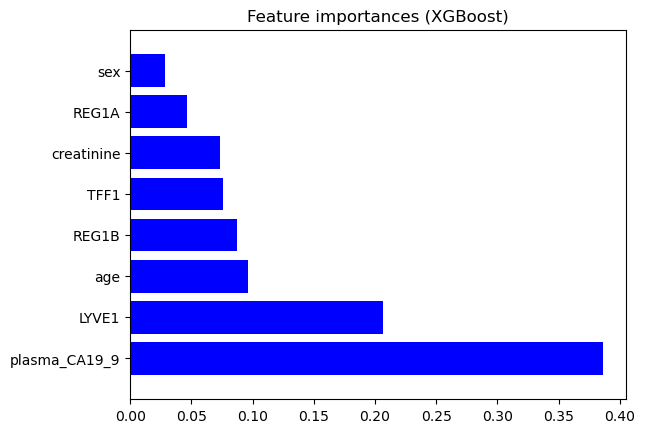

In [7]:
# XGBoost Classification
# preprocesses the data, kind of makes the first iteration of the model
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(eval_metric='logloss', objective='binary:logistic', scale_pos_weight=sum(y_train == 0) / sum(y_train == 1)))
])

# how it will find its paramaters
param_grid_xgb = {
    'xgb__n_estimators': [200, 300, 400],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.05, 0.1, 0.2],
    'xgb__reg_alpha': [0, 0.1, 0.5], #tests a bunch of paramaters to see what works best
    'xgb__reg_lambda': [0, 0.1, 0.5], #ensures model is not overfit to this specfic data, so can work well with new inputs of data
    'xgb__subsample': [0.8, 0.9, 1.0], #controls how much data xgboost sees
    'xgb__colsample_bytree': [0.8, 0.9, 1.0] #subsamples data again for every tree
}

# cross-validation with grid search
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# fits the data from grid search to the data for XGBoost
grid_search_xgb.fit(X_train, y_train)

# the best parameters and the best score for XGBoost
print("Best parameters (XGBoost): ", grid_search_xgb.best_params_)
print("Best score (XGBoost): ", grid_search_xgb.best_score_)

# calculate training accuracy for XGBoost after cross-validation
cv_scores_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_train, y_train, cv=5)
print("Cross-Validation Scores (XGBoost):", cv_scores_xgb)
print("Mean CV Score (XGBoost):", np.mean(cv_scores_xgb))

#  the best model for XGBoost, by using grid search(tries diff values and spits out best one)
best_model_xgb = grid_search_xgb.best_estimator_

# Make predictions with the best XGBoost model
y_pred_xgb = best_model_xgb.predict(X_test)

# the classification report for XGBoost
print("Classification report (XGBoost): \n", classification_report(y_test, y_pred_xgb))

# the balanced accuracy for XGBoost
print("Balanced accuracy (XGBoost): ", balanced_accuracy_score(y_test, y_pred_xgb))

# feature importances from the best XGBoost model, basically just the hyperparamters
importances_xgb = best_model_xgb.named_steps['xgb'].feature_importances_

# the feature importances in descending order, so it looks nice on the graph
indices_xgb = np.argsort(importances_xgb)[::-1]

# the graph of the feature importances for XGBoost
plt.figure()
plt.title("Feature importances (XGBoost)")
plt.barh(range(X_train.shape[1]), importances_xgb[indices_xgb],
       color="b", align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices_xgb])
plt.ylim([-1, X_train.shape[1]])
plt.show()

This dataset consists of: (590, 9)


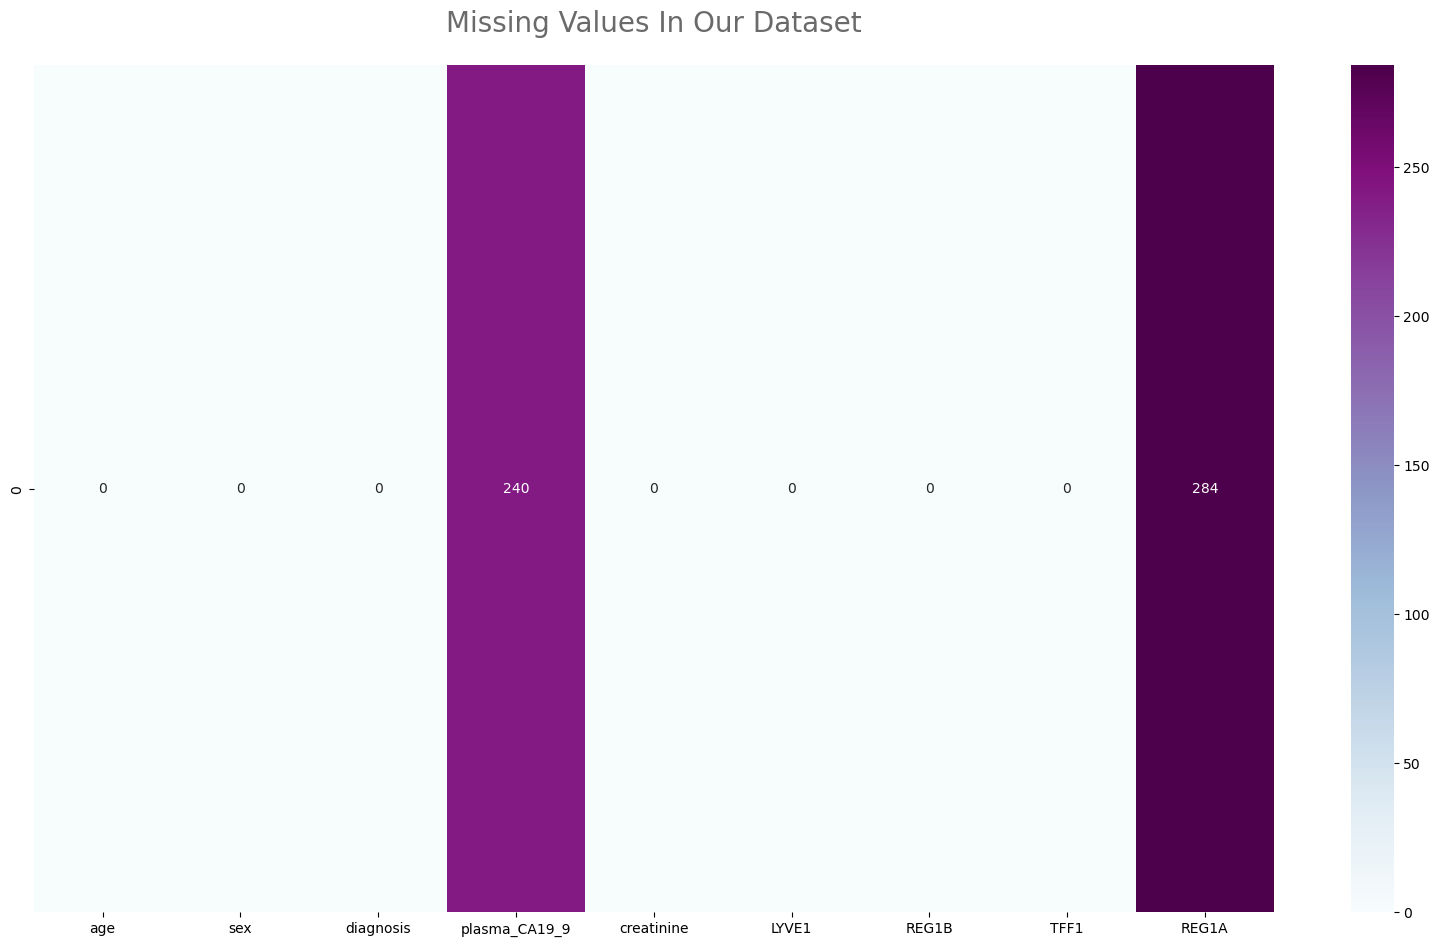

Count of True or False values in diagnosis:
Voting Classifier Accuracy: 1.0
Confusion Matrix (Voting Classifier):
[[79  0]
 [ 0 39]]
Classification Report (Voting Classifier):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        79
         1.0       1.00      1.00      1.00        39

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import lightgbm as lgb


# Custom colors
class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m'


# Custom plot size
plt.rc('figure', figsize=(20, 11))

# Display the dataframe
df.head()
print(clr.S + 'This dataset consists of:' + clr.E, df.shape)


# Check for missing values
sns.heatmap(pd.DataFrame(df.isna().sum()).T, annot=True, cmap="BuPu", fmt='d')
plt.title('Missing Values In Our Dataset', fontsize=20, color='#6a6a6a', y=1.03)
plt.show()


print(clr.S + 'Count of True or False values in diagnosis:' + clr.E)
df['diagnosis'].value_counts()


# Encode the diagnosis values directly
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].astype(str))  # Convert to string to avoid boolean issues


# Encode the 'sex' column using one-hot encoding
df = pd.get_dummies(df, columns=['sex'], drop_first=True)


# Handling missing values using imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


# Splitting the dataset into independent and dependent datasets
X = df_imputed.iloc[:, :-1].values
Y = df_imputed['diagnosis'].values


# Split datasets into training(80%) and testing(20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1212)


# Scaling the data (feature scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# Build a Logistic Regression Classifier
logistic_classifier = LogisticRegression(random_state=1212, max_iter=1000)
logistic_classifier.fit(X_train, Y_train)


# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=1212)
rf_classifier.fit(X_train, Y_train)


# Build a LightGBM Classifier
lgbm_classifier = lgb.LGBMClassifier(objective='binary', is_unbalance=True, random_state=42)
lgbm_classifier.fit(X_train, Y_train)


# Build an XGBoost Classifier
xgb_classifier = XGBClassifier(eval_metric='logloss', objective='binary:logistic', scale_pos_weight=sum(Y_train == 0) / sum(Y_train == 1))
xgb_classifier.fit(X_train, Y_train)


# Combine classifiers into a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('logistic', logistic_classifier),
    ('random_forest', rf_classifier),
    ('lightgbm', lgbm_classifier),
    ('xgboost', xgb_classifier)
], voting='soft')  # 'soft' enables probability voting for better accuracy


# Train the Voting Classifier
voting_classifier.fit(X_train, Y_train)


# Make predictions on the test data
predictions_voting = voting_classifier.predict(X_test)


# Get accuracy for the Voting Classifier
accuracy_voting = accuracy_score(Y_test, predictions_voting)
print(clr.S + 'Voting Classifier Accuracy:' + clr.E, accuracy_voting)


# Confusion Matrix
conf_matrix_voting = confusion_matrix(Y_test, predictions_voting)
print(clr.S + 'Confusion Matrix (Voting Classifier):' + clr.E)
print(conf_matrix_voting)


# Classification Report
report_voting = classification_report(Y_test, predictions_voting)
print(clr.S + 'Classification Report (Voting Classifier):' + clr.E)
print(report_voting)